In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import copy
import time
import os
import sys
sys.path.append('../../')

from data.processing import get_data

import models

from main.seir.fitting import single_fitting_cycle
from main.seir.forecast import get_forecast, forecast_all_trials, create_all_trials_csv, create_decile_csv_new
from main.seir.sensitivity import calculate_sensitivity_and_plot
from utils.generic.create_report import save_dict_and_create_report
from utils.generic.config import read_config
from utils.generic.enums import Columns
from utils.fitting.loss import Loss_Calculator
#from utils.generic.logging import log_wandb
from viz import plot_forecast, plot_top_k_trials, plot_ptiles, plot_ptiles_comp
from viz.fit import plot_all_losses

import yaml

In [3]:
from os.path import exists, join, splitext

In [8]:
from viz.uncertainty import plot_comp_CI95

In [ ]:
import pickle as pkl
with open('../../misc/predictions/final_mumbai.pickle', 'rb') as handle:
    PD = pkl.load(handle)

In [ ]:
plot_comp_CI95(PD['m0'])

9it [00:00, 86.18it/s]

Sorting trilas by  total
getting forecasts ..


2000it [00:18, 107.85it/s]
11it [00:00, 108.06it/s]

getting forecasts ..


2000it [00:16, 119.64it/s]
13it [00:00, 125.35it/s]

getting forecasts ..


2000it [00:14, 133.86it/s]
13it [00:00, 124.28it/s]

BO
getting forecasts ..


2000it [00:15, 132.10it/s]
100%|██████████| 101/101 [02:32<00:00,  1.51s/it]


Best beta - 0.1
Min Loss - 3.899915107640602


0it [00:00, ?it/s]

total
Sorting trilas by  active
getting forecasts ..


1233it [00:11, 114.38it/s]

In [8]:
predictions_dict_b = PD['m0']['BO']

In [9]:
predictions_dict_m = PD['m0']['MCMC']

In [10]:
predictions_dict_m['m1']['forecasts'] = {}        
predictions_dict_m['m1']['forecasts']['best'] = get_forecast(predictions_dict_m, train_fit='m1', 
                                                                model=config2['fitting']['model'], 
                                                                forecast_days=config2['forecast']['forecast_days'])

getting forecasts ..


In [11]:
predictions_dict_b['m1']['forecasts'] = {}
predictions_dict_b['m1']['forecasts']['best'] = get_forecast(predictions_dict_b, train_fit='m1', 
                                                                model=config1['fitting']['model'], 
                                                                forecast_days=config1['forecast']['forecast_days'])

getting forecasts ..


In [12]:
predictions_dict_m['m1']['trials_processed'] = forecast_all_trials(predictions_dict_m, train_fit='m1', 
                                                                        model=config2['fitting']['model'], 
                                                                        forecast_days=config2['forecast']['forecast_days'])

10it [00:00, 97.31it/s]

getting forecasts ..


2000it [00:16, 119.04it/s]


In [13]:
predictions_dict_b['m1']['trials_processed'] = forecast_all_trials(predictions_dict_b, train_fit='m1', 
                                                                        model=config2['fitting']['model'], 
                                                                        forecast_days=config2['forecast']['forecast_days'])

11it [00:00, 108.39it/s]

getting forecasts ..


2000it [00:17, 113.75it/s]


In [14]:
uncertainty_args_m = {'predictions_dict': predictions_dict_m, 'fitting_config': config2['fitting'],
                    'forecast_config': config2['forecast'], **config2['uncertainty']['uncertainty_params']}
uncertainty_args_b = {'predictions_dict': predictions_dict_b, 'fitting_config': config1['fitting'],
                    'forecast_config': config1['forecast'], **config1['uncertainty']['uncertainty_params']}

# Total

In [16]:
config_filename1 = 'default.yaml'
config_filename2 = 'uncer_fixed.yaml'
config1 = read_config(config_filename1)
config2 = read_config(config_filename2)
uncertainty_args_m = {'predictions_dict': predictions_dict_m, 'fitting_config': config2['fitting'],
                    'forecast_config': config2['forecast'], **config2['uncertainty']['uncertainty_params']}
uncertainty_args_b = {'predictions_dict': predictions_dict_b, 'fitting_config': config1['fitting'],
                    'forecast_config': config1['forecast'], **config1['uncertainty']['uncertainty_params']}
config1['uncertainty']['uncertainty_params']['sort_trials_by_column']


<Columns.total: Column(name='total', label='Confirmed Cases', color='C0')>

In [17]:
uncertainty_m = config2['uncertainty']['method'](**uncertainty_args_m)
predictions_dict_m['uncertainty_forecasts'] = uncertainty_m.get_forecasts()
predictions_dict_m['ensemble_mean_forecast'] = uncertainty_m.ensemble_mean_forecast
print('BO')
uncertainty_b = config1['uncertainty']['method'](**uncertainty_args_b)
predictions_dict_b['uncertainty_forecasts'] = uncertainty_b.get_forecasts()
predictions_dict_b['ensemble_mean_forecast'] = uncertainty_b.ensemble_mean_forecast
PD_t= {}
PD_t['MCMC'] = predictions_dict_m.copy()
PD_t['BO'] = predictions_dict_b.copy()

11it [00:00, 102.88it/s]

getting forecasts ..


2000it [00:15, 129.56it/s]
14it [00:00, 133.03it/s]

BO
getting forecasts ..


2000it [00:17, 112.00it/s]
100%|██████████| 101/101 [02:23<00:00,  1.42s/it]


Best beta - 0.1
Min Loss - 3.899915107640602


# Active

In [19]:
config_filename1 = 'default.yaml'
config_filename2 = 'uncer_fixed.yaml'
config1 = read_config(config_filename1)
config2 = read_config(config_filename2)
uncertainty_args_m = {'predictions_dict': predictions_dict_m, 'fitting_config': config2['fitting'],
                    'forecast_config': config2['forecast'], **config2['uncertainty']['uncertainty_params']}
uncertainty_args_b = {'predictions_dict': predictions_dict_b, 'fitting_config': config1['fitting'],
                    'forecast_config': config1['forecast'], **config1['uncertainty']['uncertainty_params']}
config1['uncertainty']['uncertainty_params']['sort_trials_by_column']

<Columns.active: Column(name='active', label='Active Cases', color='orange')>

In [20]:
uncertainty_m = config2['uncertainty']['method'](**uncertainty_args_m)
predictions_dict_m['uncertainty_forecasts'] = uncertainty_m.get_forecasts()
predictions_dict_m['ensemble_mean_forecast'] = uncertainty_m.ensemble_mean_forecast
uncertainty_b = config1['uncertainty']['method'](**uncertainty_args_b)
predictions_dict_b['uncertainty_forecasts'] = uncertainty_b.get_forecasts()
predictions_dict_b['ensemble_mean_forecast'] = uncertainty_b.ensemble_mean_forecast
PD_a= {}
PD_a['MCMC'] = predictions_dict_m.copy()
PD_a['BO'] = predictions_dict_b.copy()

26it [00:00, 124.01it/s]

getting forecasts ..


2000it [00:14, 140.94it/s]
15it [00:00, 143.53it/s]

getting forecasts ..


2000it [00:16, 123.87it/s]
100%|██████████| 101/101 [02:39<00:00,  1.58s/it]


Best beta - 0.1
Min Loss - 3.899915107640602


# Recovered

In [22]:
config_filename1 = 'default.yaml'
config_filename2 = 'uncer_fixed.yaml'
config1 = read_config(config_filename1)
config2 = read_config(config_filename2)
uncertainty_args_m = {'predictions_dict': predictions_dict_m, 'fitting_config': config2['fitting'],
                    'forecast_config': config2['forecast'], **config2['uncertainty']['uncertainty_params']}
uncertainty_args_b = {'predictions_dict': predictions_dict_b, 'fitting_config': config1['fitting'],
                    'forecast_config': config1['forecast'], **config1['uncertainty']['uncertainty_params']}
config1['uncertainty']['uncertainty_params']['sort_trials_by_column']


<Columns.recovered: Column(name='recovered', label='Recovered', color='green')>

In [23]:
uncertainty_m = config2['uncertainty']['method'](**uncertainty_args_m)
predictions_dict_m['uncertainty_forecasts'] = uncertainty_m.get_forecasts()
predictions_dict_m['ensemble_mean_forecast'] = uncertainty_m.ensemble_mean_forecast
uncertainty_b = config1['uncertainty']['method'](**uncertainty_args_b)
predictions_dict_b['uncertainty_forecasts'] = uncertainty_b.get_forecasts()
predictions_dict_b['ensemble_mean_forecast'] = uncertainty_b.ensemble_mean_forecast
PD_r= {}
PD_r['MCMC'] = predictions_dict_m.copy()
PD_r['BO'] = predictions_dict_b.copy()

11it [00:00, 103.23it/s]

getting forecasts ..


2000it [00:16, 123.27it/s]
12it [00:00, 116.78it/s]

getting forecasts ..


2000it [00:17, 116.66it/s]
100%|██████████| 101/101 [02:37<00:00,  1.56s/it]


Best beta - 0.1
Min Loss - 3.899915107640602


# Deceased

In [25]:
config_filename1 = 'default.yaml'
config_filename2 = 'uncer_fixed.yaml'
config1 = read_config(config_filename1)
config2 = read_config(config_filename2)
uncertainty_args_m = {'predictions_dict': predictions_dict_m, 'fitting_config': config2['fitting'],
                    'forecast_config': config2['forecast'], **config2['uncertainty']['uncertainty_params']}
uncertainty_args_b = {'predictions_dict': predictions_dict_b, 'fitting_config': config1['fitting'],
                    'forecast_config': config1['forecast'], **config1['uncertainty']['uncertainty_params']}
config1['uncertainty']['uncertainty_params']['sort_trials_by_column']

<Columns.deceased: Column(name='deceased', label='Deceased', color='red')>

In [26]:
uncertainty_m = config2['uncertainty']['method'](**uncertainty_args_m)
predictions_dict_m['uncertainty_forecasts'] = uncertainty_m.get_forecasts()
predictions_dict_m['ensemble_mean_forecast'] = uncertainty_m.ensemble_mean_forecast
uncertainty_b = config1['uncertainty']['method'](**uncertainty_args_b)
predictions_dict_b['uncertainty_forecasts'] = uncertainty_b.get_forecasts()
predictions_dict_b['ensemble_mean_forecast'] = uncertainty_b.ensemble_mean_forecast
PD_d= {}
PD_d['MCMC'] = predictions_dict_m.copy()
PD_d['BO'] = predictions_dict_b.copy()

12it [00:00, 117.59it/s]

getting forecasts ..


2000it [00:17, 114.61it/s]
12it [00:00, 114.84it/s]

getting forecasts ..


2000it [00:16, 120.39it/s]
100%|██████████| 101/101 [02:42<00:00,  1.61s/it]


Best beta - 0.1
Min Loss - 3.899915107640602


In [27]:
import matplotlib as mpl
## for Palatino and other serif fonts use:
plt.rcParams.update({
    'font.size': 20,
 })

total
active
recovered
deceased


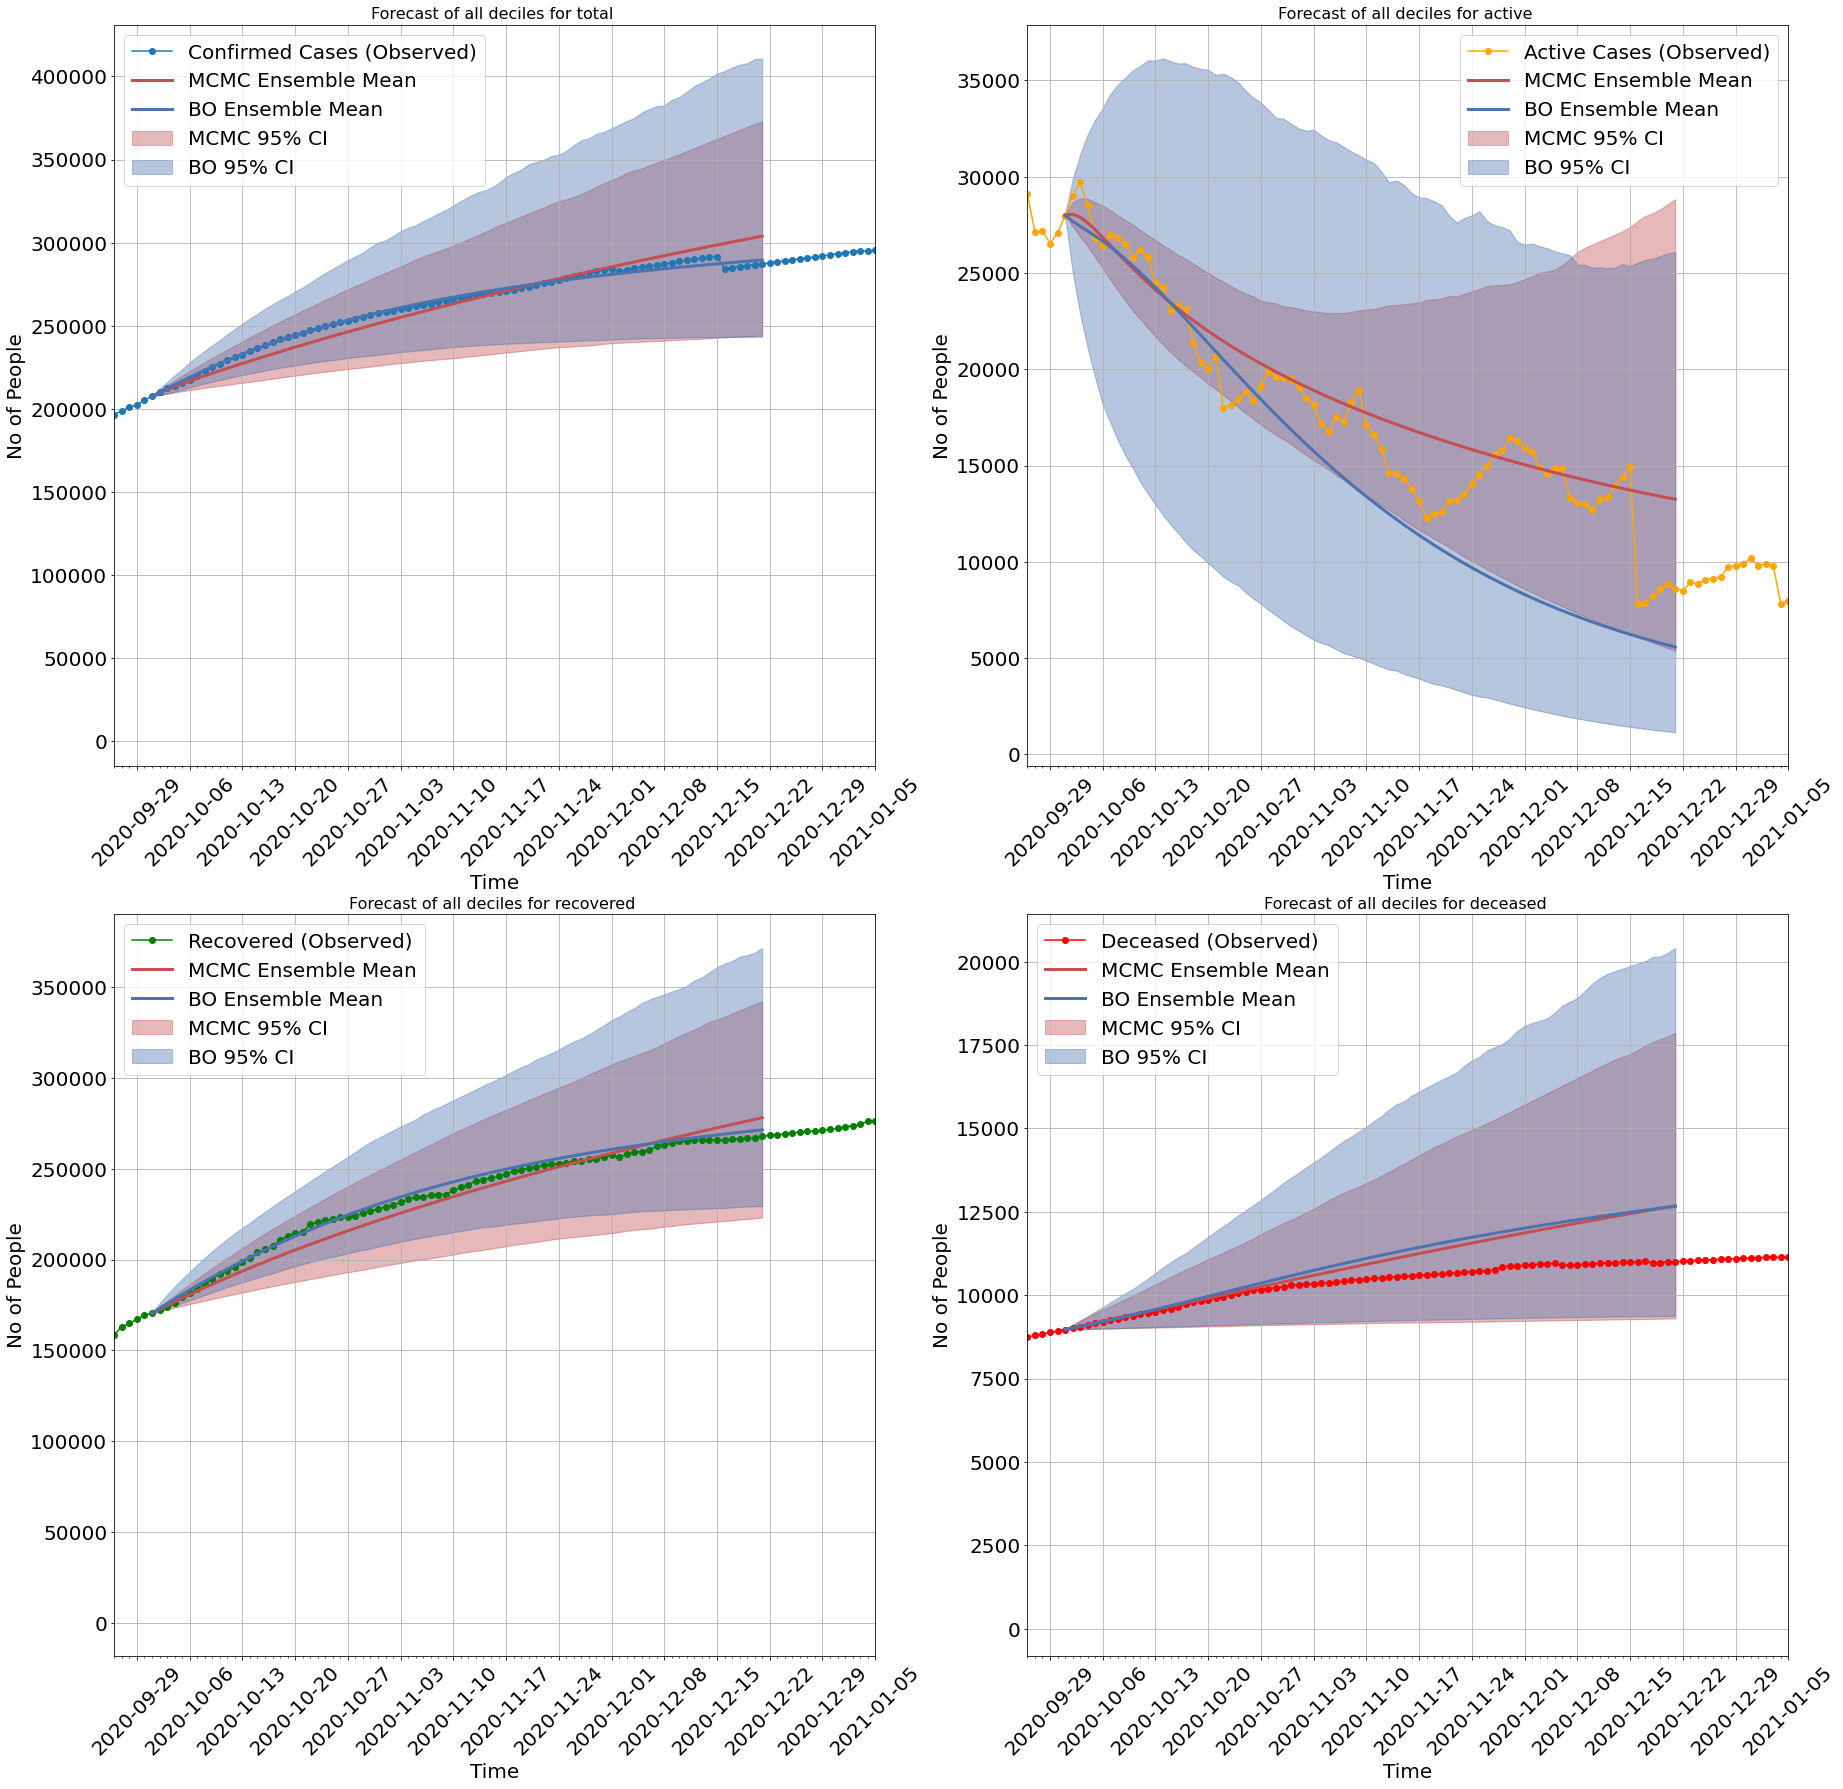

In [28]:
fig,axs = plt.subplots(figsize=(30,30),nrows=2,ncols=2) 
plot_ptiles_comp(PD_t, compartment=config1['forecast']['plot_ptiles_for_columns'][0],ax=axs.flat[0])
plot_ptiles_comp(PD_a, compartment=config1['forecast']['plot_ptiles_for_columns'][1],ax=axs.flat[1])
plot_ptiles_comp(PD_r, compartment=config1['forecast']['plot_ptiles_for_columns'][2],ax=axs.flat[2])
plot_ptiles_comp(PD_d, compartment=config1['forecast']['plot_ptiles_for_columns'][3],ax=axs.flat[3])
fig.savefig('/Users/avtansht/Desktop/Desktop/Wadhwani/Plots_final/CI.pdf',  format='pdf', bbox_inches='tight', pad_inches=0)